In [1]:
import numpy as np
import matplotlib.pyplot as plt
feat_mat = [[0,0],[1,0],[0,1],[1,1]]
y = [[0],[0],[0],[0],[0],[0],[0],[1],[1],[1],[1],[1],[1],[1]]

In [2]:
def non_zero_avg(img):
    t_sum = 0
    count = 0
    for each in img:
        for every in each:
            if every>0:
                t_sum += every
                count +=1
    return t_sum/count
    

In [3]:
import numpy as np
import cv2
def sum_line(img):
    sum= []
    for i in range(0,30):
        sum.append(np.sum(img[i]))
    return max(sum)**0.5

[[ 51.73973328 166.48026589]
 [ 71.35124386 166.41053299]
 [ 32.29551052 149.        ]
 [ 20.04993766  57.75784753]
 [ 25.19920634  58.12428571]
 [ 40.48456496 149.        ]
 [ 48.25971405 139.56832647]
 [113.66617791  76.        ]
 [ 83.48652586  41.09858247]
 [ 48.36320916  40.5064695 ]
 [ 67.46851117  40.76      ]
 [273.24714088  84.71828482]
 [ 87.56140702  40.66195591]
 [119.21409313  76.        ]]


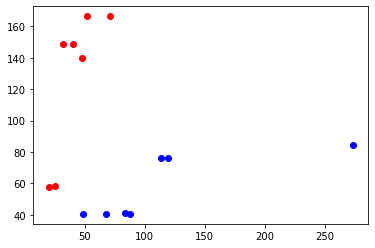

In [4]:
import matplotlib.pyplot as plt

R= []
name_list = ["poly1.png","poly2.png","poly3.png","poly4.png","poly5.png","poly6.png","poly7.png","poly8.png","poly9.png","poly10.png","poly11.png","poly12.png","poly13.png","poly14.png",]
for each in name_list:
    pth = "images/"+each
    img=cv2.imread(pth,0)
    for each in img:
        for i,every in enumerate(each):
            if every==255:
                each[i]=0
    R.append([sum_line(img),non_zero_avg(img)])
R_2= np.array(R)

plt.scatter(R_2[:7,0],R_2[:7,1],color="red")
plt.scatter(R_2[7:,0],R_2[7:,1],color="blue")
print(R_2)

In [5]:
X=R_2
y = np.array(y)
X=np.append(np.ones(y.shape),X,1)
for i in range(0,y.shape[0]):
    if(y[i][0])==0:
        X[i][0]=X[i][0]*-1
        X[i][1]=X[i][1]*-1
        X[i][2]*=-1

[[  -1.          -51.73973328 -166.48026589]
 [  -1.          -71.35124386 -166.41053299]
 [  -1.          -32.29551052 -149.        ]
 [  -1.          -20.04993766  -57.75784753]
 [  -1.          -25.19920634  -58.12428571]
 [  -1.          -40.48456496 -149.        ]
 [  -1.          -48.25971405 -139.56832647]
 [   1.          113.66617791   76.        ]
 [   1.           83.48652586   41.09858247]
 [   1.           48.36320916   40.5064695 ]
 [   1.           67.46851117   40.76      ]
 [   1.          273.24714088   84.71828482]
 [   1.           87.56140702   40.66195591]
 [   1.          119.21409313   76.        ]]


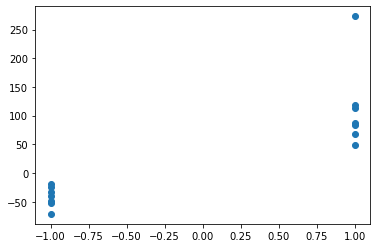

In [6]:
plt.scatter(X[:,0],X[:,1])
print(X)

In [7]:
def plotter(W):
    if W[2][0] == 0 :
        print("0 Division attempted skipping iteration")
        return
    x_var = np.linspace(0,200,100)
    y_pts= (-W[0][0] - W[1][0]*x_var)/W[2][0]
    plt.figure()    
    plt.plot(x_var,y_pts)
    X_disp=R_2
    plt.scatter(X_disp[:7,0],X_disp[:7,1],color="red")
    plt.scatter(X_disp[7:,0],X_disp[7:,1],color="blue")
    plt.title("at W as "+str(W))

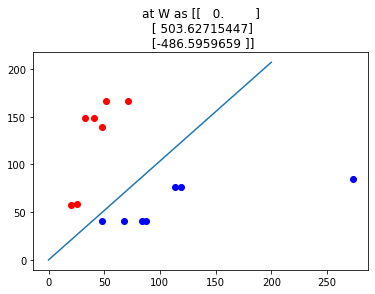

In [8]:
W = [[0],[0],[0]]
learning_rate = 1
theta = 0.05
miss_class_sum = np.zeros([3,1])

for l in range(0,100):
    miss_class_sum = np.zeros([3,1])
    missclassified = []
    for i,each in enumerate(X) :
        dot_prd = np.dot(each,W)
        if dot_prd <= 0 :
            missclassified.append(i)
    if len(missclassified)==0 :
        break
    for each in missclassified:
        a=X[each,:]
        for i in range(0,len(a)):
            miss_class_sum[i] = miss_class_sum[i] + a[i]
    criterion = learning_rate * miss_class_sum
    W = W + criterion
    plotter(W)
